# Image Manipulation with OpenCV and NumPy Deployed on [Streamlit](https://bit.ly/3qNybNt)

## Introduction

### Import Libraries

In [1]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

### Define `image_resize()` to resize image

In [2]:
def image_resize(image):
    scale_factor = int(input("Enter the scale factor by which to reduce the image size:"))
    height = int(image.shape[0] * scale_factor/100)
    width = int(image.shape[1] * scale_factor/100)
    dimensions = (width,height)

    return cv2.resize(image, dimensions)

### Read in the image.

In [3]:
path = "../../media/images/"
file_name = input("Enter file name to use:")
image_file = cv2.imread(path+file_name)

input_image = image_resize(image_file)
image_rgb = cv2.cvtColor(input_image,cv2.COLOR_BGR2RGB)

Enter file name to use:fly.jpg
Enter the scale factor by which to reduce the image size:50


In [4]:
print(image_file[:2,:2])

[[[109 122 136]
  [107 123 136]]

 [[110 123 137]
  [107 120 134]]]


In [5]:
print(image_rgb[:2,:2])

[[[136 122 108]
  [137 120 106]]

 [[132 119 107]
  [128 112 100]]]


### Display image
Code below will display the image window and close when you press any key on the keyboard

In [6]:
cv2.imshow("Image",input_image)
cv2.waitKey(-1)
cv2.destroyAllWindows()

Code below will display the image window and close when you press the letter **`q`** on the keyboard

In [7]:
test = True
while test:
    cv2.imshow("Image",input_image)
    k = cv2.waitKey(1)
    if k == ord('q'):
        test = False
cv2.destroyAllWindows()

#### Define `cv2_show_image()` to display images

In [8]:
def cv2_show_image(name,image):
    test = True
    while test:
        cv2.imshow(name,image)
        k = cv2.waitKey(1)
        if k == ord('q'):
            test = False
    cv2.destroyAllWindows()

In [15]:
cv2_show_image("Image",input_image)

In [16]:
cv2_show_image("Image", image_rgb)

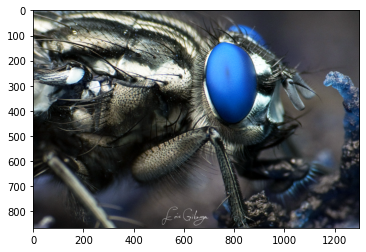

In [10]:
plt.imshow(image_file);

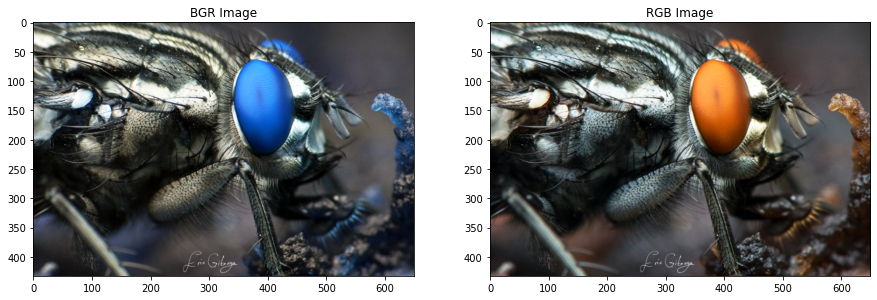

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(121);plt.imshow(input_image);plt.title("BGR Image");
plt.subplot(122);plt.imshow(image_rgb);plt.title("RGB Image");

### Split Image to Separate Colour Channels

In [ ]:
b, g, r = cv2.split(input_image)
b, g, r

In [ ]:
bgr_merged = cv2.merge((b,g,r))
rgb_merged = cv2.cvtColor(bgr_merged,cv2.COLOR_BGR2RGB)

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel");
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel");
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel");
plt.subplot(144);plt.imshow(rgb_merged);plt.title("Merged Output");

In [ ]:
b_new = b//3
g_new = g//2
r_new = r//5

bgr_merged = cv2.merge((b_new,g_new,r_new))
rgb_merged = cv2.cvtColor(bgr_merged,cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,5))
plt.subplot(141);plt.imshow(r, cmap="gray");plt.title("Red Channel");
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel");
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel");
plt.subplot(144);plt.imshow(rgb_merged);plt.title("Merged Output");

### Write Image to File

In [ ]:
cv2.imwrite(path+"resized.jpg", input_image)

### Display shape information of image (number of rows, number of columns and number of channels)

In [ ]:
input_image.shape

### Display a slice of the image
#### Full Colour

In [ ]:
show_image("Image",input_image[200:400,200:400])

#### One Channel Colour

In [ ]:
show_image("Image",input_image[200:400,200:400,1])

### Make a contrived image to play around with.

In [ ]:
height = 500
width = 500
channels = 3
contrived_image = (np.random.rand(height,width,channels) * 10).round(2)

### Two ways of displaying value of a pixel of particular channel

In [ ]:
contrived_image[:1, :1]

In [ ]:
contrived_image[1,2,1], contrived_image.item((1,2,1))

### Two ways of setting the value of a pixel of a particular channel

In [ ]:
image_copy = contrived_image.copy()
image_copy[0,0,2] = 42
contrived_image.item((0,0,2)), image_copy.item((0,0,2))

In [ ]:
image_copy[:1, :1]

In [ ]:
image_copy = contrived_image.copy()
image_copy.itemset((0,0,2), 42)
contrived_image.item((0,0,2)), image_copy.item((0,0,2))

In [ ]:
image_copy[:1, :1]

### Create data with NumPy and display

#### Use uniformly distributed data

In [ ]:
contrived_image = np.random.rand(height,width,channels)
show_image("Image", contrived_image)

#### Use normally distributed data

In [ ]:
contrived_image = np.random.randn(height,width,channels)
show_image("Image", contrived_image)

## Modifying Images
### First, change value of colours deterministically

In [ ]:
resized_image = image_resize(input_image)

### Define `is_outside()` to test limits of image data

In [ ]:
def is_outside(r, c, shape):
    if(c < 0 or c >= shape[1]):
        return True
    if(r < 0 or r >= shape[0]):
        return True
    else:
        return False

### 1. Reflect on Diagonal

In [ ]:
output_image = resized_image.copy()
dim = output_image.shape[0]
output_image = output_image[:dim,:dim,:3]
for r in range(output_image.shape[0]):
    for c in range(output_image.shape[1]):
        
        if(is_outside(r, c, resized_image.shape)):
            output_image.itemset((r,c,0), 0)
            output_image.itemset((r,c,1), 0)
            output_image.itemset((r,c,2), 0)
        else:
            val_0 = output_image.item((c,r,0))
            val_1 = output_image.item((c,r,1))
            val_2 = output_image.item((c,r,2))

        output_image[r,c] = (val_0,val_1,val_2)
show_image("Image", output_image)

### 2. A crude way to detect edges? Maybe?

In [ ]:
output_image = resized_image.copy()
diameter = 20

for r in range(resized_image.shape[0]):
    for c in range(resized_image.shape[1]):
        
        if resized_image.item((r,c,1)) >= 128:
            r1 = 0
        else:
            r1 = 255
        if resized_image.item((r,c,1)) >= 128:
            c1 = 0
        else:
            c1 = 255
                
        if(is_outside(r1, c1, resized_image.shape)):
            output_image.itemset((r,c,0), 0)
            output_image.itemset((r,c,1), 0)
            output_image.itemset((r,c,2), 0)
        else:
            output_image.itemset((r,c,0), resized_image.item((r1,c1,0)))
            output_image.itemset((r,c,1), resized_image.item((r1,c1,1)))
            output_image.itemset((r,c,2), resized_image.item((r1,c1,2)))
show_image("Image", output_image)

### 3. Replace values with NumPy generated values

In [ ]:
for r in range(resized_image.shape[0]):
    for c in range(resized_image.shape[1]):
        if(is_outside(r, c, resized_image.shape)):
            output_image.itemset((r,c,0), 0)
            output_image.itemset((r,c,1), 0)
            output_image.itemset((r,c,2), 0)
        else:
            output_image.itemset((r,c,0), np.min([resized_image.item((r,c,1)), resized_image.item((r,c,2))]))
            output_image.itemset((r,c,1), np.min([resized_image.item((r,c,0)), resized_image.item((r,c,2))]))
            output_image.itemset((r,c,2), np.min([resized_image.item((r,c,0)), resized_image.item((r,c,1))]))
show_image("Image", output_image)

### 4. Swap around the RGB Channels
That time when you needed to read up on [Permutations and Combinations](https://betterexplained.com/articles/easy-permutations-and-combinations/) and then a [LinkedIn post](https://www.linkedin.com/posts/walidhossain99_learning-teaching-probability-activity-6814662003924332544-OJNZ/) on the same showed up!

In [ ]:
output_image = resized_image.copy()
for r in range(output_image.shape[0]):
    for c in range(output_image.shape[1]):
        
        if(is_outside(r, c, resized_image.shape)):
            output_image.itemset((r,c,0), 0)
            output_image.itemset((r,c,1), 0)
            output_image.itemset((r,c,2), 0)
        else:
            val_0 = output_image.item((r,c,0))
            val_1 = output_image.item((r,c,1))
            val_2 = output_image.item((r,c,2))
        output_image[r,c] = (val_0,val_1,val_2)
show_image("Image", output_image)

### 5. Change pixel values using mathematical functions

In [ ]:
output_image = resized_image.copy()

for r in range(resized_image.shape[0]):
    for c in range(resized_image.shape[1]):
        output_image.itemset((r,c,0), resized_image.item((r,c,0))*math.e)
        output_image.itemset((r,c,1), resized_image.item((r,c,1))*math.e)
        output_image.itemset((r,c,2), resized_image.item((r,c,2))*math.e)

show_image("Image", output_image)

### 6 Splatter Effect

### Script from [George Lecakes](https://www.linkedin.com/in/george-lecakes-jr-phd-1831814b/) [demonstrating the splatter effect](https://www.youtube.com/watch?v=iLoMqAE_8A8)
#### Using Uniformly Distributed Random Data

In [ ]:
output_image = resized_image.copy()
diameter = 20

for r in range(resized_image.shape[0]):
    for c in range(resized_image.shape[1]):
        
        r1 = r + math.ceil(np.random.uniform(-0.5,0.5) * diameter)
        c1 = c + math.ceil(np.random.uniform(-0.5,0.5) * diameter)
                
        if(is_outside(r1, c1, resized_image.shape)):
            output_image.itemset((r,c,0), 0)
            output_image.itemset((r,c,1), 0)
            output_image.itemset((r,c,2), 0)
        else:
            output_image.itemset((r,c,0), resized_image.item((r1,c1,0)))
            output_image.itemset((r,c,1), resized_image.item((r1,c1,1)))
            output_image.itemset((r,c,2), resized_image.item((r1,c1,2)))
show_image("Image", output_image)

#### Using Normally Distributed Random Data

In [ ]:
output_image = resized_image.copy()
diameter = 60

for r in range(resized_image.shape[0]):
    for c in range(resized_image.shape[1]):
        
        r1 = r + math.ceil(np.random.normal(-0.5,0.5) * diameter)
        c1 = c + math.ceil(np.random.normal(-0.5,0.5) * diameter)
                
        if(is_outside(r1, c1, resized_image.shape)):
            output_image.itemset((r,c,0), 0)
            output_image.itemset((r,c,1), 0)
            output_image.itemset((r,c,2), 0)
        else:
            output_image.itemset((r,c,0), resized_image.item((r1,c1,0)))
            output_image.itemset((r,c,1), resized_image.item((r1,c1,1)))
            output_image.itemset((r,c,2), resized_image.item((r1,c1,2)))
show_image("Image", output_image)